# Estimation de la latence et de la capacité d’une connexion à partir de mesures asymétriques (sujet 4)

## Introduction

Pour notre analyse sur les caractéristiques d'une connexion nous utiliserons un modèle simplifié qui néglige certains détails.
Ce modèle permet de mettre en relation le **temps d'envoi $T$** (en secondes) d'un message de **taille $S$** (en octets) par une connexion de **latence $L$** (en secondes) et de **capacité $C$** (en octets/seconde) par la formule suivante : $$T(S) = L + S/C$$

Nous allons donc tenter de déterminer la latence et la capacité d'une connection à partir de deux jeux de données brutes, qui ont été obtenus pour deux connexions différentes avec l'outil `ping`.

## Analyse des données

### Dépendances

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

### 1. Connexion courte à l'intérieur d'un campus

In [2]:
raw_data_1 = pd.read_csv("http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/liglab2.log.gz",sep=' ',header=None)

Les données brutes sont stockées dans une variable `raw_data_1`

In [3]:
def convert_date(raw_date):
    return float(raw_date[1:-1])-1421761682

def convert_size(raw_size):
    return int(raw_size)

def convert_time(raw_time):
    if(pd.isna(raw_time)):
        return None
    return float(raw_time[5:])

def format_data(raw_data):
    output_data = {}
    output_data["date"] = [convert_date(d) for d in raw_data[0]]
    output_data["size"] = [convert_size(s) for s in raw_data[1]]
    output_data["time"] = [convert_time(t) for t in raw_data[8]]
    return output_data

data_1 = format_data(raw_data_1)

Les données brutes sont formatée pour obtenir la date, la taille et le temps d'envoi de chaque mesure.

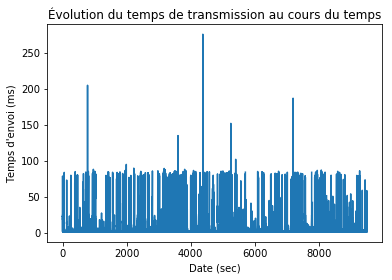

In [4]:
def display_graph(start=0,end=-1):
    plt.plot(data_1["date"][start:end],data_1["time"][start:end])
    plt.xlabel("Date (sec)")
    plt.ylabel("Temps d'envoi (ms)")
    plt.title("Évolution du temps de transmission au cours du temps")
    plt.show()

display_graph()

L'évolution du temps de transmission est représenté ici sur toute la plage de données.
On constate une tendance du temps de transmission entre 50ms et 100ms.
Cependant on constate également que cette valeur est très variable, avec des pics à plus de 250ms et des creux avoisinants les 1ms.
Il semble probable que ces fluctuations ne soient pas seulement dûes à la taille des messages mais également à d'autres paramètres extérieurs.

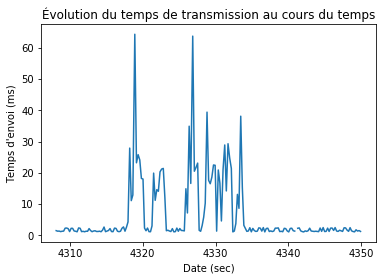

In [6]:
display_graph(20300,20500)

En observant ici les données sur une échelle plus petite, on constate le même phénomène de fluctuation importante du temps de transmission.